In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
hd=pd.read_csv('heart_disease.csv')

In [5]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


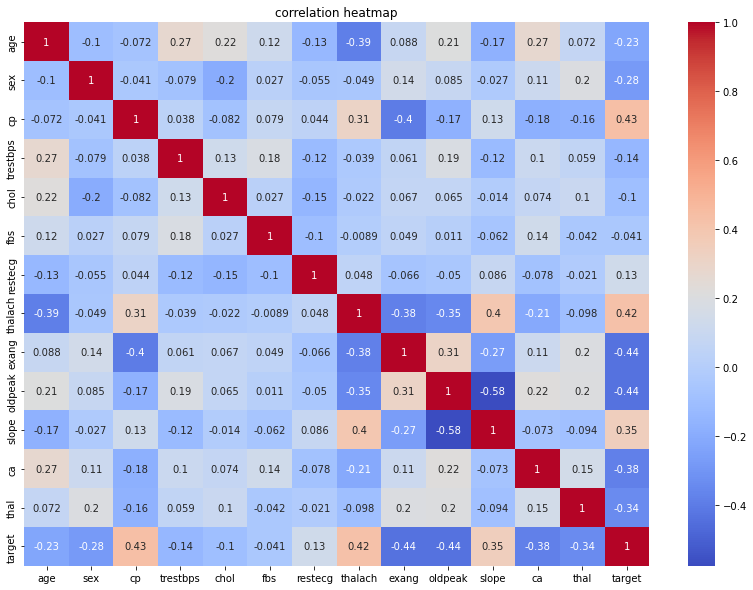

In [6]:
#visvalization
plt.figure(figsize=(14,10))
sns.heatmap(hd.corr(),annot=True,cmap="coolwarm")
plt.title("correlation heatmap")
plt.show()

In [7]:
x=hd.drop("target",axis=1)

In [8]:
y=hd["target"]

In [9]:
print(x)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [10]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_pred=model.predict(x_test)

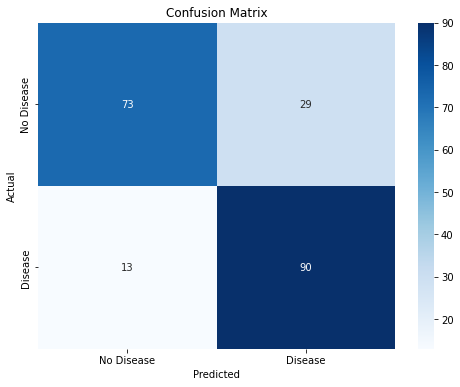

In [14]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], 
            yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



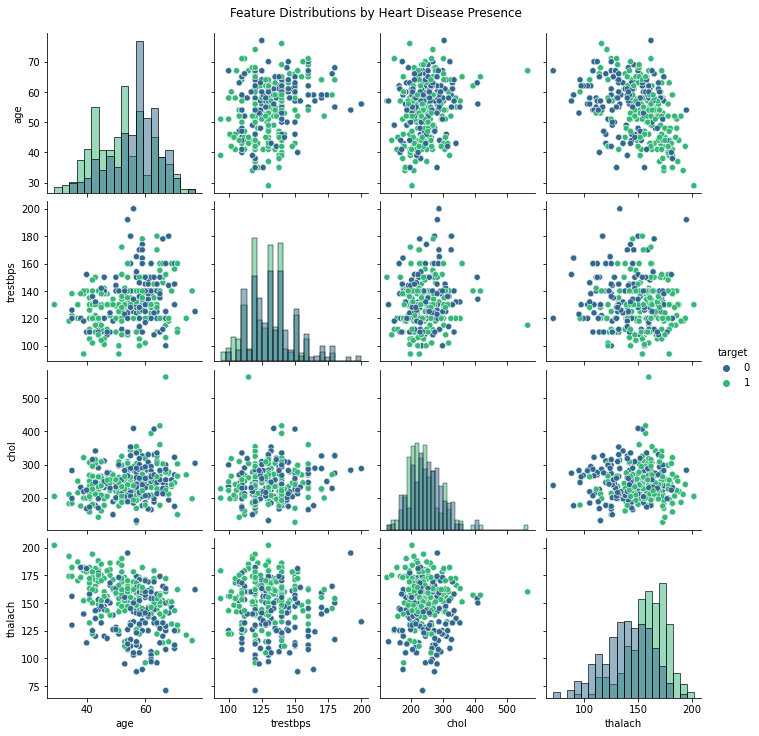

In [16]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Pairplot for selected features
selected_features = ["age", "trestbps", "chol", "thalach"]
sns.pairplot(hd[selected_features + ["target"]], hue="target", palette="viridis", diag_kind="hist")
plt.suptitle("Feature Distributions by Heart Disease Presence", y=1.02)
plt.show()


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Load your dataset
hd = pd.read_csv("heart_disease.csv")

# Separate features and target
X = hd.drop("target", axis=1)  # Features
y = hd["target"]              # Target

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)        # Transform testing data

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluate the model on test data
y_pred = model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# --- New Data Testing ---
# Example of new data (replace with actual values)
new_data = pd.DataFrame({
    "age": [55],
    "trestbps": [140],
    "chol": [240],
    "thalach": [150],
    "sex": [1],
    "cp": [2],         # Chest pain type
    "fbs": [0],        # Fasting blood sugar > 120 mg/dl
    "restecg": [1],    # Resting ECG results
    "exang": [0],      # Exercise-induced angina
    "oldpeak": [1.4],  # ST depression induced by exercise
    "slope": [2],      # Slope of the peak exercise ST segment
    "ca": [0],         # Number of major vessels
    "thal": [3]        # Thalassemia type
})

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Predict on new data
new_prediction = model.predict(new_data_scaled)
new_prediction_prob = model.predict_proba(new_data_scaled)

# Display the results
print("New Data Prediction (Class):", new_prediction)
print("New Data Prediction Probabilities:", new_prediction_prob)



Confusion Matrix:
 [[73 29]
 [13 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

New Data Prediction (Class): [0]
New Data Prediction Probabilities: [[1.00000000e+00 1.08066936e-23]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
